In [1]:
## mashup script for batch changes
import math
from collections import Counter
from datetime import datetime, timedelta
from geopandas.tools import sjoin
from pyproj import proj
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point
import geopandas as gpd
import fiona
from fulcrum import Fulcrum

In [2]:
# variables
apiToken = "2ef04ab67ab414b7ac6c7815235ace6f9cdf3ab79b9e0874beb053a9dfa9bb682d7bbd1a3117b68e"
urlBase = 'https://api.fulcrumapp.com/api/v2/'
fulcrum = Fulcrum(key=apiToken)
osTimestamp = datetime.today() - timedelta(days=1)
recordsPerPage = 5000
formID = "0092aa7f-a2e8-4972-8f26-46eb98b23a12" #change this to the app you want to update


In [54]:
formData = fulcrum.forms.find(formID)

recordCount = formData['form']['record_count']
pages = math.ceil(recordCount / 5000)

data = []
for p in range(1, pages + 1):
    dataPage = fulcrum.records.search(
        url_params={'form_id': formID, 'page': p, 'per_page': 5000})['records']
    data.extend(dataPage)

In [55]:
noloc = missmatch = match = notfilter = incomplete = 0
rfi = nar = match = oh = incomplete = 0

<Axes: >

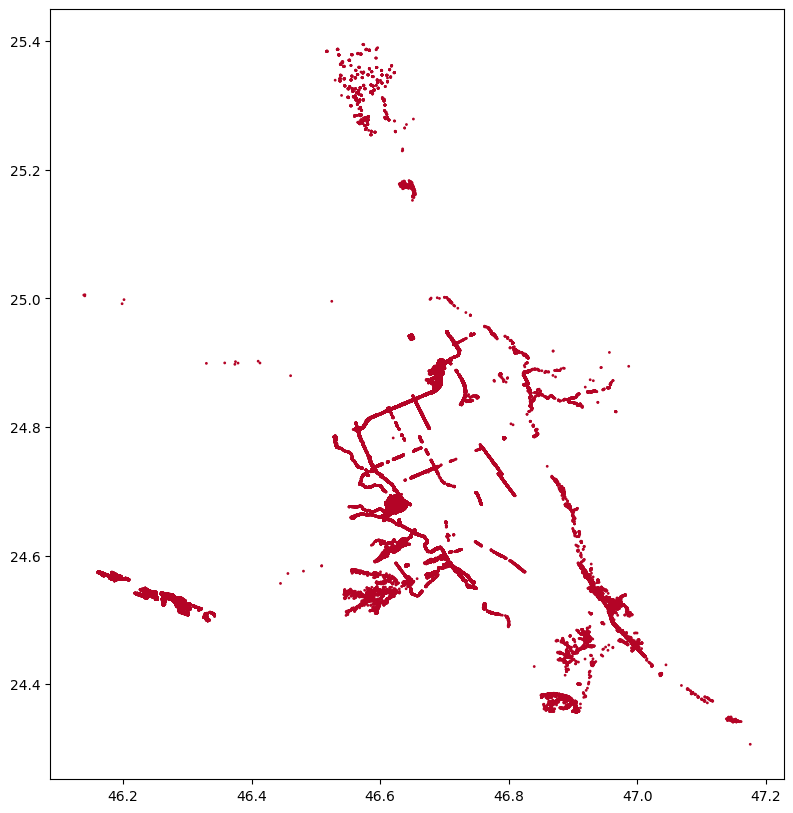

In [56]:
df = pd.DataFrame(data)
inventory = gpd.GeoDataFrame(df, geometry = gpd.points_from_xy(df.longitude, df.latitude))

inventory['dups']=inventory.duplicated(['geometry'],'first')
inventory.plot('dups', 'coolwarm_r', markersize=1,figsize=[10,10])
# inventory.to_file(r"/Users/philipp/Downloads/dups.gpkg", driver='GPKG', layer='TMO_dups')

In [57]:
dubremove=inventory[inventory['dups']==True]['id']
# dubs_remove_id=dubs_remove['id']

In [58]:
len(list(dubremove))

0

In [59]:
# get unique project IDs in a list
projectList = list()
for record in data:
	projectId = record['project_id']
	if projectId not in projectList:
		projectList.append(projectId)

# create dict with matching names
result = {}
for i in projectList:
	try:
		projectInfo = fulcrum.projects.find(i)['project']
		result[i] = projectInfo['name']
	except:
		result[i] = 'Unknown Project'

# add project names to org data
for record in data:
	record['project'] = result.get(record['project_id'], 'Unknown')

In [37]:
result

{'bd831820-7ea6-4272-b39d-24fa678adcd1': 'DQ',
 '8b0726a7-e56e-4230-874c-e55c63693caf': 'THM',
 '2f9d23fc-a4f2-4d32-b7a6-78b90966fc6d': 'WH-RCRC',
 '7a403c59-e25f-43ee-b06e-1c5c1b8d6399': 'WS',
 '1cfc2325-0ced-4bd8-81d5-61e886db2076': 'KFCC',
 '17378cbd-675d-4e01-b267-f48487220488': 'KAR',
 '4356787d-7a0e-4b61-a887-c6d874ff5cac': 'MRJ',
 '7739a1cf-2bfd-4a10-ad53-094150492232': 'NRR',
 '5ee04eb4-3a98-43df-9575-70024beaa246': 'KFR',
 '6cc59f6b-951b-4260-ac27-84347c7726a9': 'KKR',
 'd8352cfb-f482-4c25-a3b4-41bf9b8b7980': 'KKIA Wadi',
 '28da8fb0-6d7d-426b-a5fd-98d03249e4cd': 'WLA',
 '4dee659d-da93-42af-bff8-8699e1efc171': 'WGU',
 'da262c44-56cd-4139-914d-23034108bf03': 'BP',
 '7d2c5f4e-7fd1-42d1-b78a-c1fa17b6488a': 'WAO',
 '9a3af406-dce5-42bc-88f3-6538efc7edcd': 'WNA',
 'adfb37ab-273c-429d-9738-75437048f0d5': 'WSA',
 'd2e5d465-7aa8-410d-95ef-3e3f25634773': 'Al Hair',
 'd1666750-72c0-47c9-b264-44d23a245137': 'ILF',
 'c88caf4e-8f36-40ea-a1ba-f57e22017400': 'WH-DGDA',
 'db7767da-a358-4d53-8e1

In [14]:
from decimal import *
d = Decimal('56.4325')
d.as_tuple().exponent

-4

In [66]:
#float(record['form_values']['009b'])
str(record['form_values']['009b'])
#(Decimal(record['form_values']['009b'])<-2)

'1.826887488365173'

In [64]:
missmatch=match=0
for record in data:
    if record['project_id']== None :
        record['project_id'] ='758ea9ba-a108-440d-970b-4ad2259521c9'
        #record['form_values']['009b']=round(float(record['form_values']['009b']),2)
        recordUpdated = fulcrum.records.update(record['id'], record)
        match = match + 1
        # print(match)
    else:
       missmatch = missmatch+1

In [83]:
(Decimal(record['form_values']['009b'])).as_tuple().exponent<-2

# print(d.as_tuple().exponent<-2)


True

In [86]:
missmatch=match=0
for record in data:
    if ('009b' in record['form_values']) and ((Decimal(record['form_values']['009b'])).as_tuple().exponent<-2):

        record['form_values']['009b']=str(round(float(record['form_values']['009b']),1))
        recordUpdated = fulcrum.records.update(record['id'], record)
        match = match + 1
        print(match)
    else:
       missmatch = missmatch+1
       print('m',missmatch)

m 1
m 2
m 3
m 4
m 5
m 6
m 7
m 8
m 9
m 10
m 11
m 12
m 13
m 14
m 15
m 16
m 17
m 18
m 19
m 20
m 21
m 22
m 23
m 24
m 25
m 26
m 27
m 28
m 29
m 30
m 31
m 32
m 33
m 34
m 35
m 36
m 37
m 38
m 39
m 40
m 41
m 42
m 43
m 44
m 45
m 46
m 47
m 48
m 49
m 50
m 51
m 52
m 53
m 54
m 55
m 56
m 57
m 58
m 59
m 60
m 61
m 62
m 63
m 64
m 65
m 66
m 67
m 68
m 69
m 70
m 71
m 72
m 73
m 74
m 75
m 76
m 77
m 78
m 79
m 80
m 81
m 82
m 83
m 84
m 85
m 86
m 87
m 88
m 89
m 90
m 91
m 92
m 93
m 94
m 95
m 96
m 97
m 98
m 99
m 100
m 101
m 102
m 103
m 104
m 105
m 106
m 107
m 108
m 109
m 110
m 111
m 112
m 113
m 114
m 115
m 116
m 117
m 118
m 119
m 120
m 121
m 122
m 123
m 124
m 125
m 126
m 127
m 128
m 129
m 130
m 131
m 132
m 133
m 134
m 135
m 136
m 137
m 138
m 139
m 140
m 141
m 142
m 143
m 144
m 145
m 146
m 147
m 148
m 149
m 150
m 151
m 152
m 153
m 154
m 155
m 156
m 157
m 158
m 159
m 160
m 161
m 162
m 163
m 164
m 165
m 166
m 167
m 168
m 169
m 170
m 171
m 172
m 173
m 174
m 175
m 176
m 177
m 178
m 179
m 180
m 181
m 182
m 183
m 184
m 18

In [50]:
missmatch=match=0
for record in data:
    if record['project'] == 'BRT-SAF':
        if '8350' not in record['form_values']:
            record['form_values']['8350']='01/01/2021'
            recordUpdated = fulcrum.records.update(record['id'], record)
            match = match + 1
            print(match)
        else:
            print('done')
    else:
        missmatch = missmatch+1

done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done


In [49]:
match

0

In [ ]:
missmatch=match=0
for record in data:
    if record['id'] in list(dubremove):
        # record['form_values']['3fee']['choice_values']=['Acacia aneura - سنط أنيورا']
        match = match + 1
        print(match)
        fulcrum.records.delete(record['id'])
        # recordUpdated = fulcrum.records.update(record['id'], record)
    else:
        # noloc=noloc+1
        # record['form_values']['3fee']= {'choice_values':['No Name - لا يوجد اسم']}
        # recordUpdated = fulcrum.records.update(record['id'], record)
        missmatch=missmatch+1


In [ ]:
for record in dataTarget:
    if record['status']=='Issue in place - قضية موجودة':
        record['status']='Request of activation - طلب تفعيل'

        match = match + 1 
        recordUpdated = fulcrum.records.update(record['id'], record)
        # record['form_values']['3fee']= {'other_values':['unknown']}
    else:
        missmatch=missmatch+1

In [ ]:
match

In [ ]:
for record in dataTarget:
    if record['status'] == 'Inspection required':
        record['status'] = 'Request of inspection (RFI) - طلب معاينة'
        rfi = rfi+1
        print('rfi',rfi)
        recordUpdated = fulcrum.records.update(record['id'], record)
    elif record['status'] == 'Action required':
        record['status']= 'Issue in place - قضية موجودة'
        nar = nar+1
        print('nar',nar)
        recordUpdated = fulcrum.records.update(record['id'], record)
    elif record['status'] == 'No action required':
        record['status'] = 'No action required - لا حاجة لأي إجراء'
        nar = nar+1
        print('nar',nar)
        recordUpdated = fulcrum.records.update(record['id'], record)
    elif record['status'] == 'On Hold':
        record['status'] = 'On hold - قضية عالقة'
        oh = oh+1
        print('oh',oh)
        recordUpdated = fulcrum.records.update(record['id'], record)
    else:
        print('do nothing')

    # recordUpdated = fulcrum.records.update(record['id'], record)

In [ ]:
match=0
for record in dataTarget:
    if record['latitude']==89.990000 and record['longitude']== 180.000000  :
        # record['form_values']['3fee']['choice_values']=['Acacia aneura - سنط أنيورا']
        match= match + 1
        print(match)
        fulcrum.records.delete(record['id'])
        # recordUpdated = fulcrum.records.update(record['id'], record)
    else:
        noloc=noloc+1
        # record['form_values']['3fee']= {'choice_values':['No Name - لا يوجد اسم']}
        # recordUpdated = fulcrum.records.update(record['id'], record)
        missmatch=missmatch+1

In [ ]:
match